<a href="https://colab.research.google.com/github/Ahmad3752/Colab/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/covid_19_clean_complete.csv')
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [20]:
df['Month'] = df['Date'].astype(str).str.split('-').str[1]
df['Month'].value_counts()

,count
Month,
03,8091
05,8091
04,7830
06,7830
02,7569
07,7047
01,2610


In [28]:
month_grp=df.groupby(['Month','Country/Region'])
ans=month_grp['Confirmed'].sum().reset_index()
ans.head(50)

,Month,Country/Region,Confirmed
0,01,Afghanistan,0
1,01,Albania,0
2,01,Algeria,0
3,01,Andorra,0
4,01,Angola,0
5,01,Antigua and Barbuda,0
6,01,Argentina,0
7,01,Armenia,0
8,01,Australia,38
9,01,Austria,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


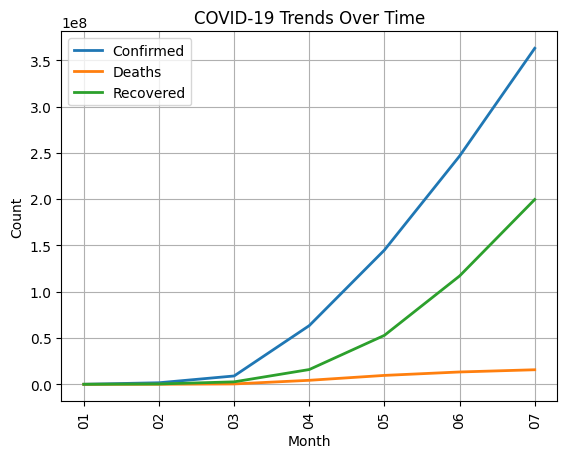

In [35]:
# Group by date & sum cases
df_grouped = df.groupby('Month')[['Confirmed', 'Deaths', 'Recovered']].sum()

df_grouped.plot( linewidth=2)
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('COVID-19 Trends Over Time')
plt.legend(['Confirmed', 'Deaths', 'Recovered'])
plt.grid(True)
plt.show()


In [ ]:
print(f" the dataset shape is {df.shape}")
print(f" The column names are {df.columns}")
print(f"{df.isna().sum()}")
row,columns=df.shape
print(f"THE ROWS ARE {row}")
print(f"THE ROWS ARE {columns}")

 the dataset shape is (49068, 10)
 The column names are Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64
THE ROWS ARE 49068
THE ROWS ARE 10


In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


Text(0.5, 1.0, 'WHO REGION')

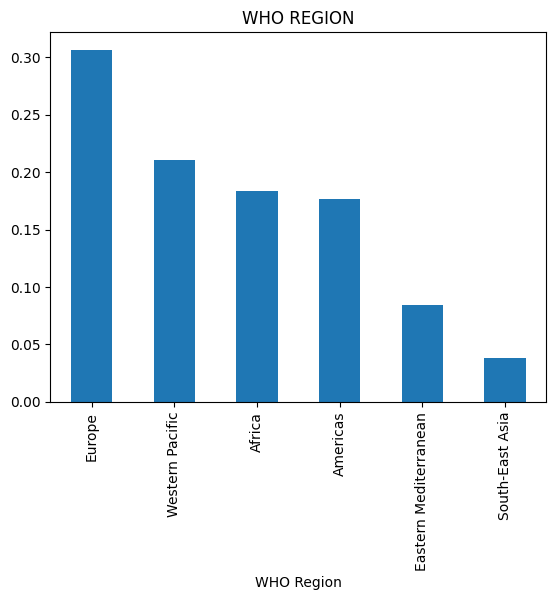

In [ ]:
#BTW I HAVE TAKEN JUST WHO REGION AS OTHER ORE HAVING TOO MUCH CARDINALITY
df['WHO Region'].value_counts(normalize=True).plot(kind='bar')
plt.title('WHO REGION')


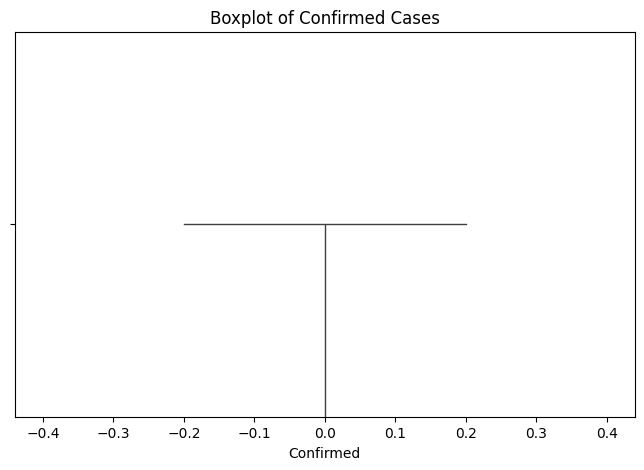

In [31]:
# Boxplot for Confirmed Cases
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Confirmed'],vert=True)
plt.title('Boxplot of Confirmed Cases')
plt.show()


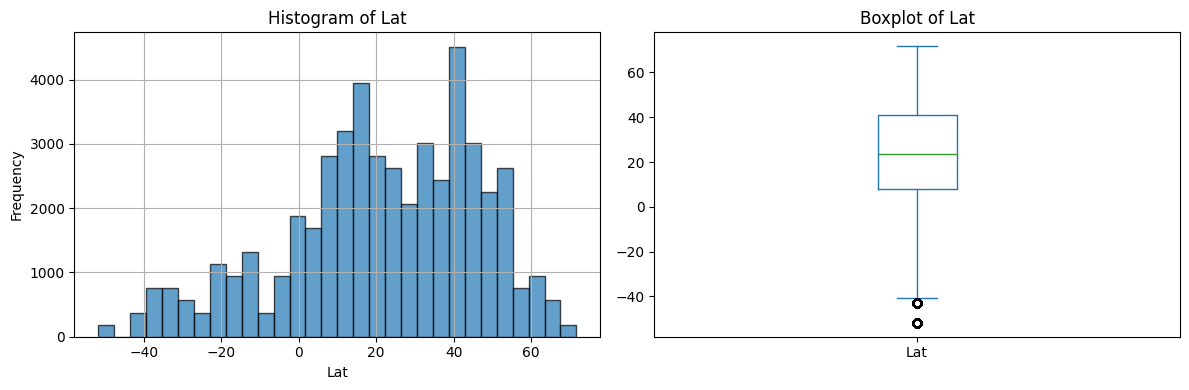

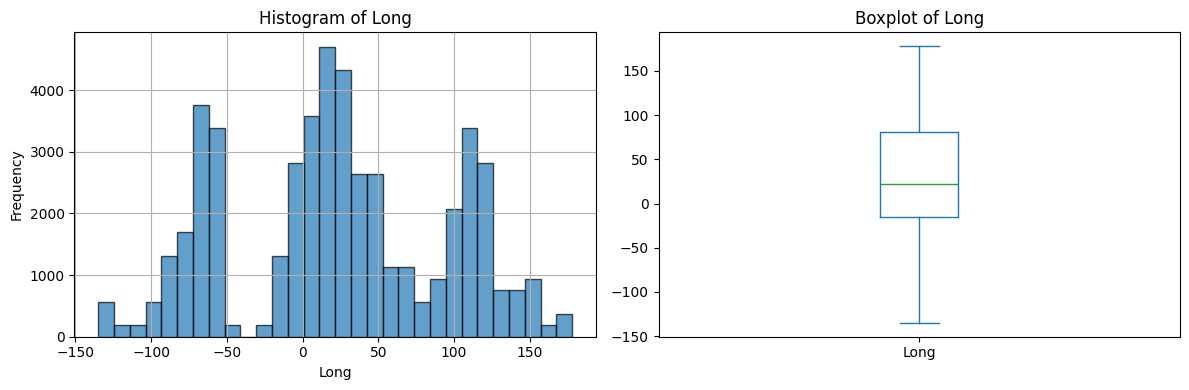

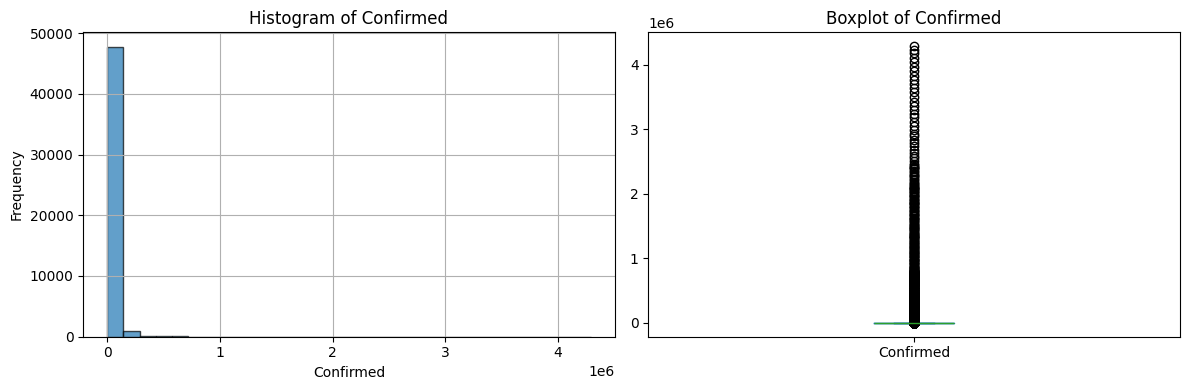

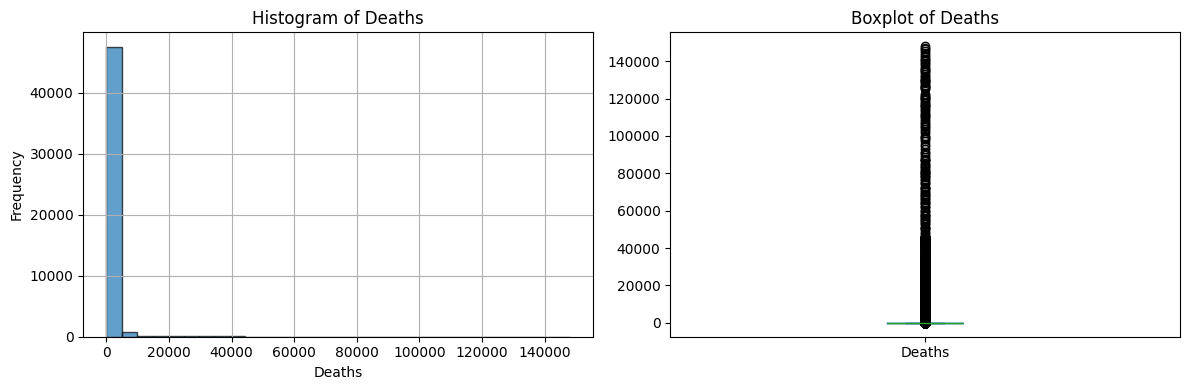

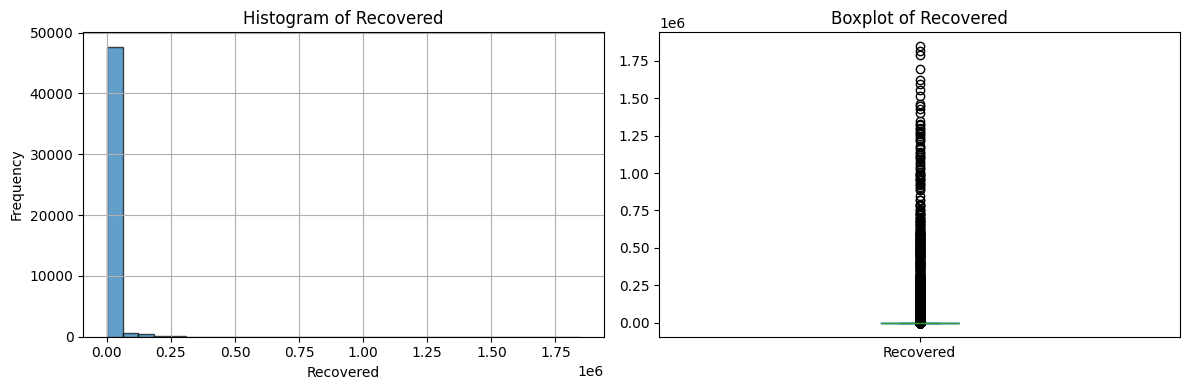

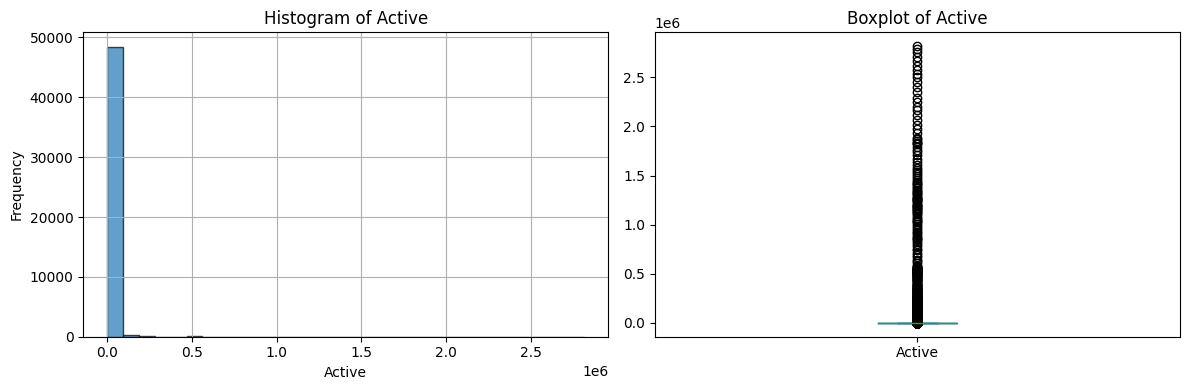

In [ ]:
#i am using redundant code by ploting histogram and boxplot same to same

def plot_histograms_and_boxplots(df):
    numerical_cols = df.select_dtypes(include=['number'])
    for col in numerical_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        df[col].plot(kind='hist', bins=30, alpha=0.7, edgecolor='black', ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        axes[0].grid(True)
        df[col].plot(kind='box', vert=True, ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')

        plt.tight_layout()

plot_histograms_and_boxplots(df)


<Axes: >

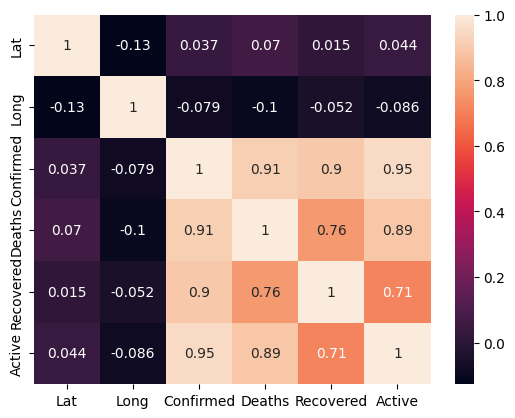

In [ ]:
cor=df.select_dtypes(include=['number']).corr()
sns.heatmap(cor,annot=True)

Text(0.5, 1.0, 'Scatter Plot of Active vs Confirmed Cases')

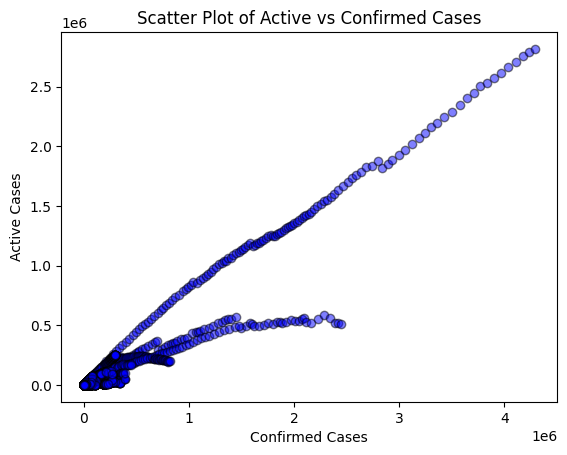

In [ ]:
#okay now from this i will oplot scatter plot forthose variable having high correlation
plt.scatter(df['Confirmed'], df['Active'], alpha=0.5, color='blue', edgecolors='black')

plt.xlabel('Confirmed Cases')
plt.ylabel('Active Cases')
plt.title('Scatter Plot of Active vs Confirmed Cases')

In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
#btw after usng this i dont have any missing values so not doing imputing
df.drop(columns=['Province/State'],inplace=True)
df.isna().sum()

,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


<ipython-input-44-aaa3c32970b1>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['WHO Region'], y=df['Active'], estimator=sum, ci=None)


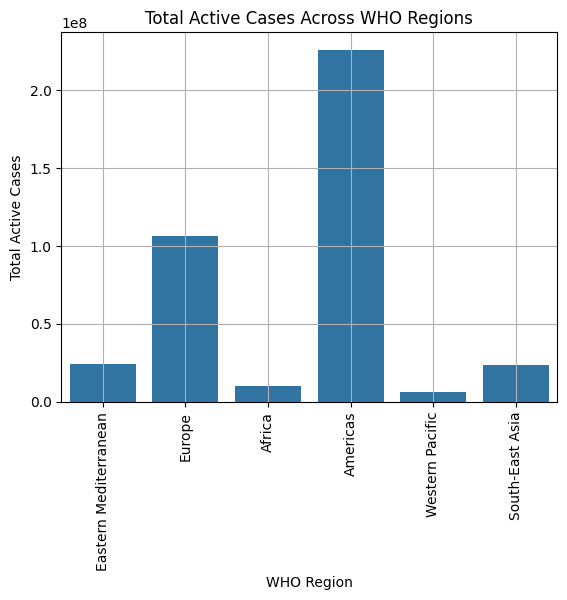

In [ ]:

sns.barplot(x=df['WHO Region'], y=df['Active'], estimator=sum, ci=None)
plt.title("Total Active Cases Across WHO Regions")
plt.xticks(rotation=90)
plt.xlabel("WHO Region")
plt.ylabel("Total Active Cases")
plt.grid(True);


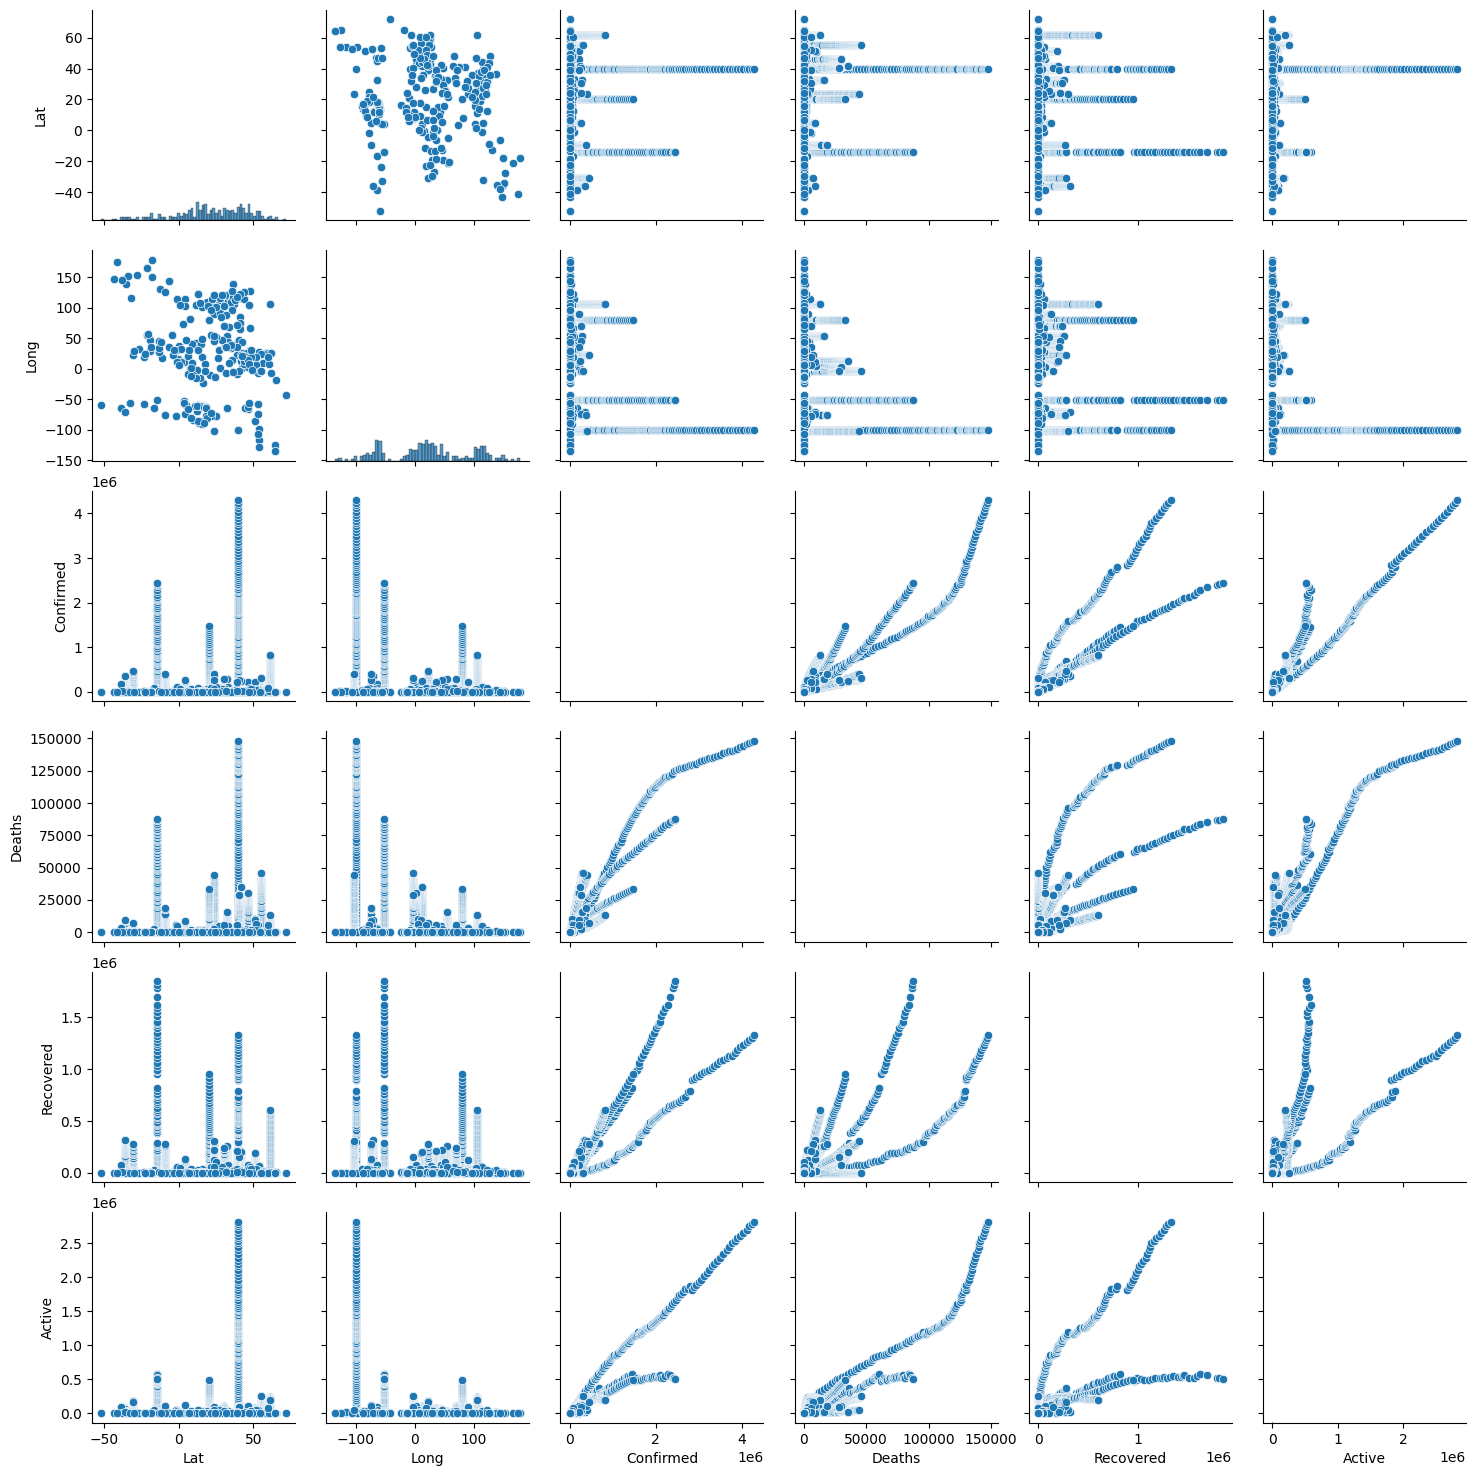

In [37]:
# Pairplot for numerical features
numeric_cols = df.select_dtypes(include=['number']).columns
sns.pairplot([numeric_cols])
plt.show()


In [38]:
mnth_grp=df.groupby('Country/Region')
mnth_grp

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,01


In [43]:

country_grp = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()
country_grp['Mortality Rate (%)'] = (country_grp['Deaths'] / country_grp['Confirmed']) * 100
country_grp['Recovery Rate (%)'] = (country_grp['Recovered'] / country_grp['Confirmed']) * 100

country_grp.reset_index(inplace=True)
print(country_grp[['Country/Region','Mortality Rate (%)','Recovery Rate (%)']].head(10))


        Country/Region  Mortality Rate (%)  Recovery Rate (%)
0          Afghanistan            2.535543          41.223101
1              Albania            2.901852          60.435074
2              Algeria            6.609169          64.072371
3              Andorra            5.744460          73.168510
4               Angola            4.756862          29.004501
5  Antigua and Barbuda            7.265433          57.945175
6            Argentina            2.196282          37.747767
7              Armenia            1.706745          54.025743
8            Australia            1.185841          74.140091
9              Austria            3.508132          80.510628


In [44]:
print(country_grp)

         Country/Region  Confirmed  Deaths  Recovered  Mortality Rate (%)  \
0           Afghanistan    1936390   49098     798240            2.535543   
1               Albania     196702    5708     118877            2.901852   
2               Algeria    1179755   77972     755897            6.609169   
3               Andorra      94404    5423      69074            5.744460   
4                Angola      22662    1078       6573            4.756862   
..                  ...        ...     ...        ...                 ...   
182  West Bank and Gaza     233461    1370      61124            0.586822   
183      Western Sahara        901      63        648            6.992231   
184               Yemen      67180   17707      23779           26.357547   
185              Zambia     129421    2643      83611            2.042172   
186            Zimbabwe      50794     881      12207            1.734457   

     Recovery Rate (%)  
0            41.223101  
1            60.435074  


<ipython-input-46-aac0d0301cb9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Confirmed', y='Country/Region', data=top_countries, palette='coolwarm')


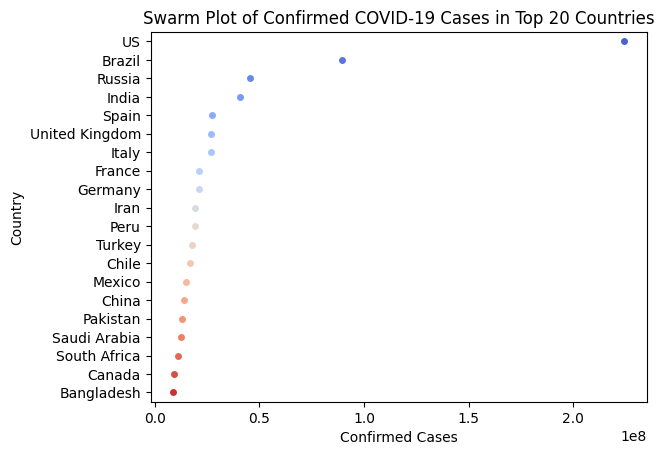

In [46]:
top_countries = df.groupby('Country/Region')['Confirmed'].sum().nlargest(20).reset_index()

sns.swarmplot(x='Confirmed', y='Country/Region', data=top_countries, palette='coolwarm')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.title('Swarm Plot of Confirmed COVID-19 Cases in Top 20 Countries')
plt.show();

In [47]:
import plotly.express as px

country_grp = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

fig = px.choropleth(country_grp,
                     locations="Country/Region",
                     locationmode="country names",
                     color="Confirmed",
                     hover_name="Country/Region",
                     color_continuous_scale="Reds",
                     title="Global COVID-19 Confirmed Cases")

fig.show()


In [48]:
df.head(1)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,01


In [49]:
province_grp = df.groupby('Province/State')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

fig = px.choropleth(province_grp,
                     locations="Province/State",
                     locationmode="country names",
                     color="Confirmed",
                     hover_name="Province/State",
                     color_continuous_scale="Plasma",
                     title="Province-wise COVID-19 Confirmed Cases")

fig.show()